<a href="https://colab.research.google.com/github/jacobmlloyd/credit-risk-modeling/blob/main/Loan_Risk_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intro

This dataset uses publicly available Lending Tree data on loans and whether the loan was considered Good or Bad (depending on the outcome of the loans payments). The goal of this project is to use machine learning models to predict the BAD column of the dataset. We want to be able to predict the outcome of the loan and be able to apply this model to new customers later on.

## Data Dictionary

| Name   | Description                                    |
|--------|------------------------------------------------|
| YOB    | Year of Birth (99 if unknown)                  |
| NKID   | Number of Children                             |
| DEP    | Number of Other Dependents                     |
| PHON   | Is there a homephone? 1 = yes; 0 = no          |
| SINC   | Spouses Income                                 |
| AES    | Applicants Employment Status (See Notes Below) |
| DAINC  | Applicants Income                              |
| RES    | Residential Status (See Notes Below)           |
| DHVAL  | Value of Home                                  |
| DMORT  | Outstanding Mortgage Balance                   |
| DOUTM  | Outgoings on Mortgage or Rent                  |
| DOUTL  | Outgoings on Loans                             |
| DOUTHP | Outgoings on Hire Purchase                     |
| DOUTCC | Outgoings on Credit Cards                      |
| BAD    | 1 = Bad, 0 = Good                              |

> AES Options: V = Government,
  W = housewife,
  M = military,
  P = private sector,
  B = public sector,
  R = retired,
  E = self employed,
  T = student,
  U = unemployed,
  N = others,
  Z  = no response

> RES Options: O = Owner,
  F = tenant furnished,
  U = Tenant Unfurnished,
  P = With parents,
  N = Other,
  Z = No response,

> DHVAL Options: 0 = no response or not owner,
  000001 = zero value,
  blank = no response,

> DMORT Options: 0 = no response or not owner,
  000001 = zero balance,
  blank = no response,

This data was originally obtained from the Lending Tree, a loan platform. The data was compiled to show borrowers information and the outcome of the loan. Good indicates the loan ended in good standing and bad indicates that the loan didn't end up favorable for the lender. If we can create a machine learning model for this data, we would be able to predict the outcome of a loan and reduce risk.

# Import and View the Data

## Imports

In [54]:
# Basic Python Data Tools
import pandas as pd
import scipy.sparse

# Exploratory Data Analysis tools
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn import set_config


set_config(display="diagram") # Easy viewing of pipelines

## Load and view the dataset

Let's view the data head to get an idea of the data we are working with.

In [55]:
df = pd.read_csv("https://raw.githubusercontent.com/jacobmlloyd/credit-risk-modeling/main/Loan%20Data.csv")
df.head()

,YOB,NKID,DEP,PHON,SINC,AES,DAINC,RES,DHVAL,DMORT,DOUTM,DOUTL,DOUTHP,DOUTCC,BAD
0,19.0,4.0,0.0,1,0.0,R,0.0,O,14464.0,4.0,0.0,0.0,0.0,0.0,0.0
1,41.0,2.0,0.0,1,0.0,P,36000.0,O,0.0,0.0,280.0,664.0,0.0,80.0,0.0
2,66.0,0.0,0.0,1,0.0,N,30000.0,N,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,51.0,2.0,0.0,1,0.0,P,464.0,O,24928.0,8464.0,584.0,320.0,0.0,60.0,0.0
4,65.0,0.0,0.0,1,0.0,P,15000.0,P,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Viewing the shape and the info of the dataset will give us a better idea about our data.

In [56]:
print(df.shape)
print(df.info())

(1225, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1225 entries, 0 to 1224
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YOB     1225 non-null   float64
 1   NKID    1225 non-null   float64
 2   DEP     1225 non-null   float64
 3   PHON    1225 non-null   int64  
 4   SINC    1225 non-null   float64
 5   AES     1225 non-null   object 
 6   DAINC   1225 non-null   float64
 7   RES     1225 non-null   object 
 8   DHVAL   1225 non-null   float64
 9   DMORT   1225 non-null   float64
 10  DOUTM   1225 non-null   float64
 11  DOUTL   1225 non-null   float64
 12  DOUTHP  1225 non-null   float64
 13  DOUTCC  1225 non-null   float64
 14  BAD     1225 non-null   float64
dtypes: float64(12), int64(1), object(2)
memory usage: 143.7+ KB
None


For this dataset we are going to use all of our features, or columns. They all seem to be the appropriate type and since there are no null values we can move onto cleaning the data.

# Cleaning the Data

Identify and handle duplicate values appropriately.

In [57]:
print(f"There are {df.duplicated().sum()} duplicate rows.")

There are 23 duplicate rows.


In [58]:
df.drop_duplicates(inplace = True)

In [59]:
print(f"There are {df.duplicated().sum()} duplicate rows.")

There are 0 duplicate rows.


Look for missing values

In [60]:
print(f"There are {df.isna().sum().sum()} missing values.")

There are 0 missing values.


Next let's look for possible data inconsistencies

In [61]:
df.describe()

,YOB,NKID,DEP,PHON,SINC,DAINC,DHVAL,DMORT,DOUTM,DOUTL,DOUTHP,DOUTCC,BAD
count,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000,1202.000000
mean,50.772879,0.635607,0.039101,0.901830,2028.164725,21608.285358,15994.156406,11440.492512,348.549085,124.259567,29.271215,40.352745,0.263727
std,15.232284,1.021988,0.221948,0.297668,4840.129086,15788.943238,20818.817347,19004.622659,429.422730,847.470142,120.394389,170.214916,0.440836
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,0.000000,0.000000,1.000000,0.000000,9464.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,0.000000,0.000000,1.000000,0.000000,19800.000000,0.000000,0.000000,280.000000,0.000000,0.000000,0.000000,0.000000
75%,63.000000,1.000000,0.000000,1.000000,1245.000000,30900.000000,30080.000000,20348.000000,536.000000,0.000000,0.000000,0.000000,1.000000
max,99.000000,5.000000,2.000000,1.000000,50000.000000,64800.000000,64928.000000,64000.000000,3800.000000,28000.000000,1600.000000,2800.000000,1.000000


Though it appears there could possibly be outliers, after reviewing each value and the data describe table, I've concluded there is no need to address the outliers as they are valid points of data in the dataframe. 

In [62]:
for column in df.columns:
  if df[column].dtype == "O":
    print(f"COLUMN {column}:")
    print(df[column].value_counts())
    print("-----")

COLUMN AES:
P    530
V    230
E    124
R    103
T    103
W     37
B     30
M     23
U      8
Z      8
N      6
Name: AES, dtype: int64
-----
COLUMN RES:
O    624
P    231
U    153
F    129
N     65
Name: RES, dtype: int64
-----


There doesn't seem to be inconsistencies here.

# Visual

## Informational Graphs

To better inform us about the values in the data we are working with we should visualize the data we are working with. The easiest way to do this is to put the numerical data into histograms and view each seperately.

<function matplotlib.pyplot.show>

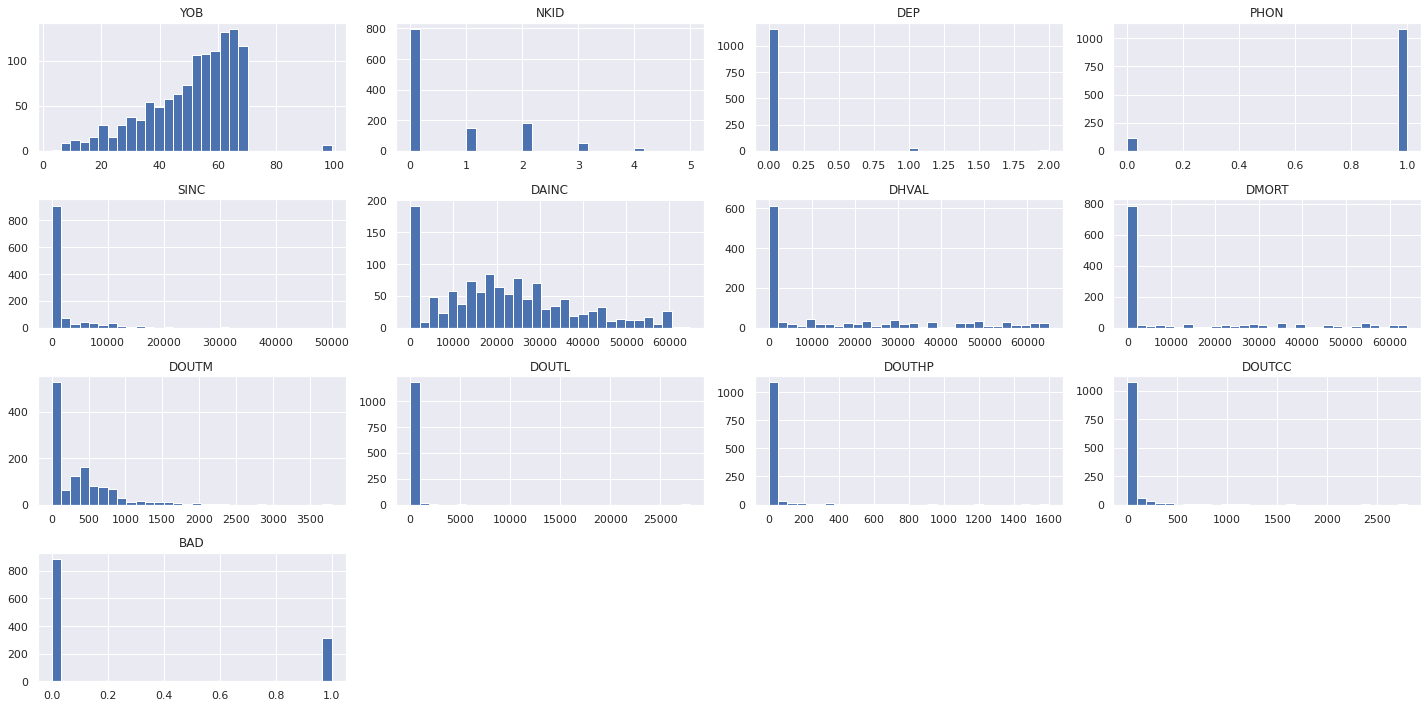

In [63]:
df.hist(figsize=(20, 10), bins=30)
plt.tight_layout()
plt.show

## Histograms

In order for us to view the categorical data, we will create custom histograms.

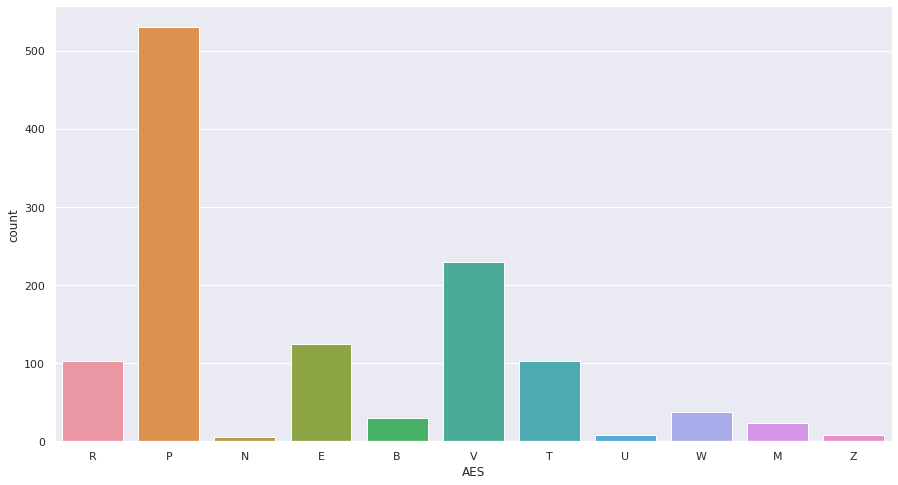

In [64]:
sns.countplot(x = df['AES'])

We can see that P (private sector) is the largest area of the applicants employment status by far. 

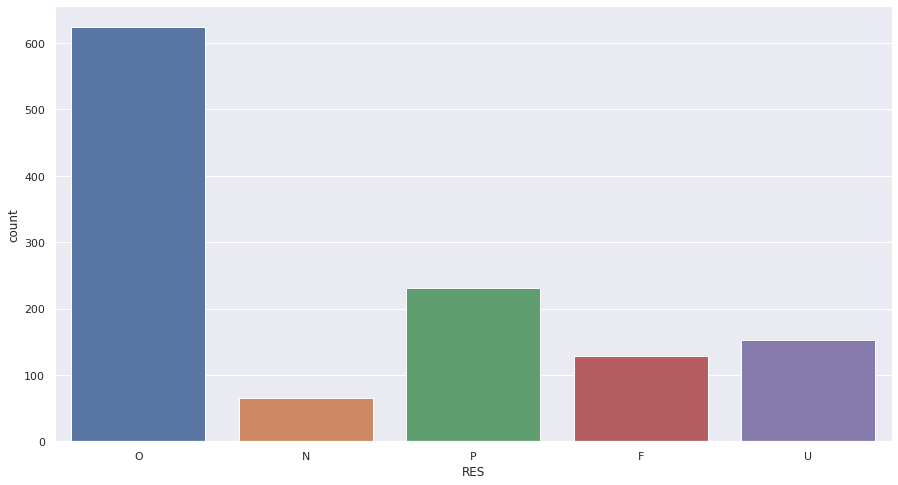

In [65]:
sns.countplot(x = df['RES'])

Viewing this data on the residential status shows that most of our data is based off of homeowners. We will dive into this more during our exploratory analysis.

## Heatmap

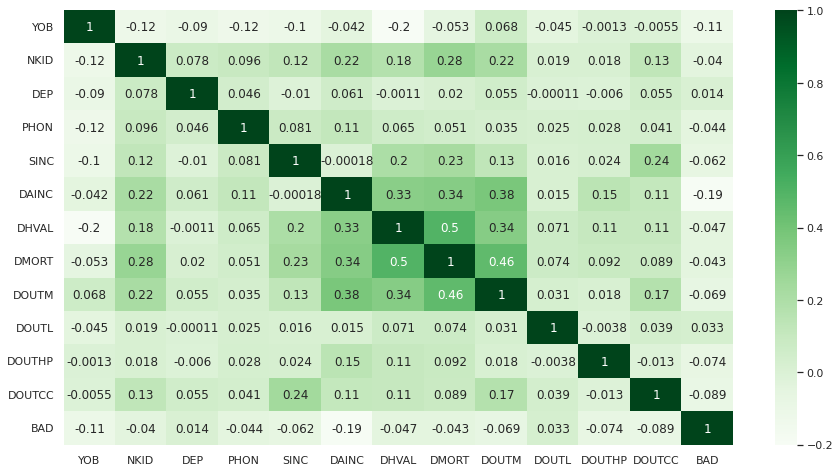

In [66]:
corr = df.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(corr, cmap = 'Greens', annot = True)

Our heatmap allows us to see that there isn't a strong correlation betwee my target (BAD) and any other features. I can see between DAINC, DHVAL, DMORT, and DOUTM, there is a bit of correlation.

# Machine Learning Models

## Preprocessing

Since this is a binary classification problem, I will use classification models. Our predicted outcome is either 1 or 0, and while these are numbers we want them to be seen as categories. We will train test split our data and create the pipeline.

In [67]:
y = df['BAD']
X = df.drop(columns = ['BAD'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
scaler = StandardScaler()

categorical_pipe = make_pipeline(ohe)
category_tuple = (categorical_pipe, cat_selector)

number_pipe = make_pipeline(scaler)
number_tuple = (number_pipe, num_selector)

preprocessor = make_column_transformer(category_tuple, number_tuple)

## Logistic Regression

For Logistic Regression, the models were tested using scaled and non-scaled data. Scaled data performed better overall so the model was kept.

### Base Model Logistic Regression

We can use a pipeline to create a logistical regression model. We will fine tune this model later on after testing a base model.

Instantiate and create the pipeline

In [68]:
# Instantiate Model and Scaler
logreg = LogisticRegression()

# Create pipeline
logreg_pipe = make_pipeline(preprocessor, logreg)

# Training the model on the data
logreg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb540ad3d50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb540b3a690>)])),
                ('logisticregression', LogisticRegression())])

Let's view the default scores for this model before hyper tuning. 

In [69]:
print(f"Training Scores for non-optimized Logistical Regression: {logreg_pipe.score(X_train, y_train)}")
print(f"Testing Scores for non-optimized Logistical Regression: {logreg_pipe.score(X_test, y_test)}")

Training Scores for non-optimized Logistical Regression: 0.7458379578246392
Testing Scores for non-optimized Logistical Regression: 0.7441860465116279


We have about a 74% accuracy on the testing data, and a 74% on the training data. Let's hypertune the model for this set.

### Hypertuning Logistic Regression

#### L1 Tuning

The first hyperparameter tuning we are going to use is L1 tuning. We are going to use a simple for loop after defining our base variables to iterate and test various C values, then we will view them on a plot to determine the C value to continue with (if we continue with this model). 

{0.0001: 0.7308970099667774,
 0.001: 0.7308970099667774,
 0.01: 0.7308970099667774,
 0.1: 0.7408637873754153,
 1: 0.7375415282392026,
 10: 0.7408637873754153,
 100: 0.7408637873754153,
 1000: 0.7408637873754153}

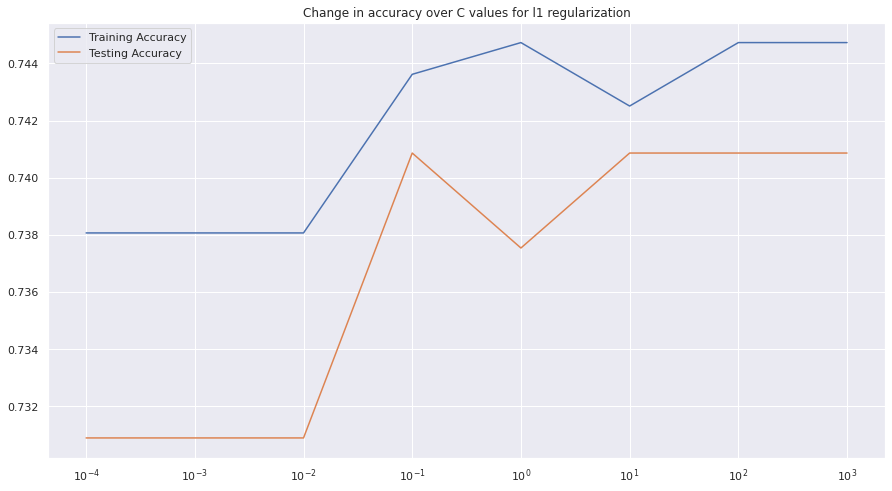

In [70]:
# Used Coding Dojo Lessons as reference

c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

# Iteration for collecting scores based on C
for c in c_values:
  log_reg = LogisticRegression(C = c, max_iter = 1000, solver='liblinear', penalty='l1')
  log_reg_pipe = make_pipeline(preprocessor, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
 
# Plotting
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for l1 regularization')
ax.legend()
 
#set the x axis to a logarithmic scale to show the values of C in even intervals
ax.set_xscale('log')
# print a dictionary of values of C and accuracy scores
{c:score for c, score in zip(c_values, test_scores)}

Both the testing and training model performed the best with a C value of 0.1 in the test set.

In [71]:
logreg_l1 = LogisticRegression(C = .1, max_iter = 1000, solver='liblinear', penalty='l1')
logreg_pipe_l1 = make_pipeline(preprocessor, logreg_l1)
logreg_pipe_l1.fit(X_train, y_train)

print(f"Training Scores for L1 Tuned Logistical Regression: {logreg_pipe_l1.score(X_train, y_train)}")
print(f"Testing Scores for L1 Tuned Logistical Regression: {logreg_pipe_l1.score(X_test, y_test)}")

Training Scores for L1 Tuned Logistical Regression: 0.7436182019977803
Testing Scores for L1 Tuned Logistical Regression: 0.7408637873754153


Using L1 tuning there is a slightly higher Testing accuracy compared to the base model, but we should continue testing other models. Let's see if this accuracy is useful by viewing our confusion matrix. 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


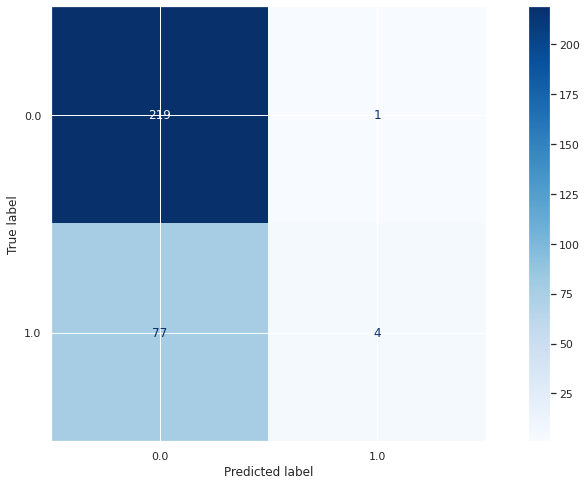

In [86]:
plot_confusion_matrix(logreg_pipe_l1, X_test, y_test, cmap = 'Blues')

Even though th emodel was 74% accurate, it was very bad at being able to predict the "BAD" class. This is a forseeable problem since our dataset isn't that large.

#### L2 Tuning

The next hyperparameter tuning we are going to use is L2 tuning. We are going to follow the same process as L1 tuning except with an l2 penalty.

{0.13: 0.7475083056478405,
 0.14: 0.7508305647840532,
 0.15: 0.7508305647840532,
 0.16: 0.7508305647840532,
 0.17: 0.7508305647840532,
 0.18: 0.7475083056478405,
 0.19: 0.7475083056478405}

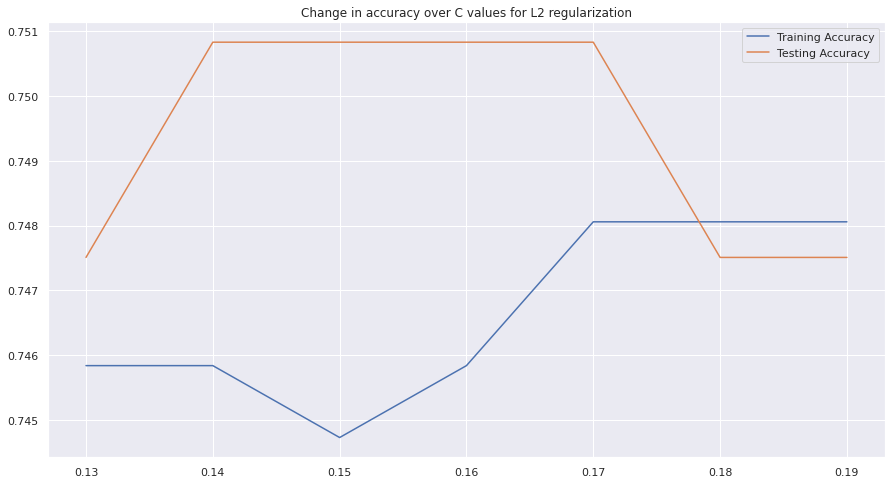

In [72]:
# Used Coding Dojo Lessons as reference
c_values = [x/100 for x in range(13, 20)]
train_scores = []
test_scores = []

# Iteration for collecting scores based on C
for c in c_values:
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(preprocessor, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))
  
# Plot
fig, ax = plt.subplots(1,1)
ax.plot(c_values, train_scores, label='Training Accuracy')
ax.plot(c_values, test_scores, label='Testing Accuracy')
ax.set_xticks(c_values)
ax.set_title('Change in accuracy over C values for L2 regularization')
ax.legend()

{c:score for c, score in zip(c_values, test_scores)}

This tuning model had various performance with the following C values, but ended up aroun .1 - 1 mark with the best results
```
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
```
The graph you see above is refined to get the values near .1 - 1 that could attribute to a better score. Here we see that .18 is the most optimal C value for not over or underfit data. Let's view the score of that model.

In [73]:
logreg_l2 = LogisticRegression(C = .18, max_iter = 1000, solver='liblinear', penalty='l2')
logreg_pipe_l2 = make_pipeline(preprocessor, logreg_l2)
logreg_pipe_l2.fit(X_train, y_train)

print(f"Training Scores for L2 Tuned Logistical Regression: {logreg_pipe_l2.score(X_train, y_train)}")
print(f"Testing Scores for L2 Tuned Logistical Regression: {logreg_pipe_l2.score(X_test, y_test)}")

Training Scores for L2 Tuned Logistical Regression: 0.7480577136514983
Testing Scores for L2 Tuned Logistical Regression: 0.7475083056478405


Now that we have our scores, and the model is not overfit, we can view the confusion matrix to see how it compares to L1 and the base model.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


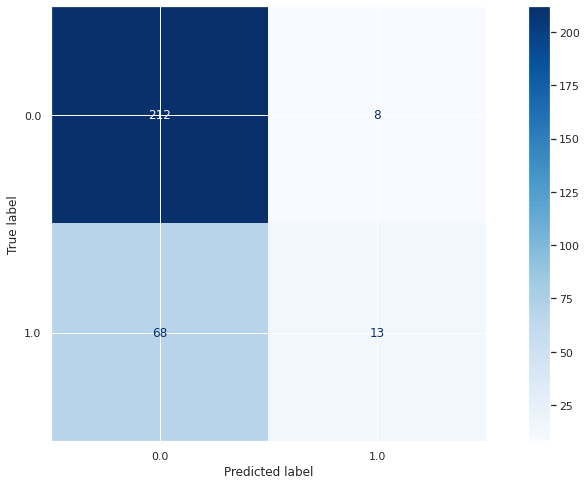

In [85]:
plot_confusion_matrix(logreg_pipe_l2, X_test, y_test, cmap = 'Blues')

Our matrix here is much better at predicting for the "BAD" class, but there is still room to improve.

## Decision Tree Model

### Base Model Decision Tree

The next model to test as a base model, then hypertune, is a decision tree  model. Since the model isn't distance based, I did not test scaled and unscaled data. Instead we will use the data scaled for convinience and move forward.

In [74]:
dec_tree = DecisionTreeClassifier(random_state = 42)
dec_tree_pipeline = make_pipeline(preprocessor, dec_tree)
dec_tree_pipeline.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb540ad3d50>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7fb540b3a690>)])),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(random_state=42))])

In [75]:
print(f"Training Scores for Random Forest Model Base: {dec_tree_pipeline.score(X_train, y_train)}")
print(f"Testing Scores for Random Forest Model Base: {dec_tree_pipeline.score(X_test, y_test)}")

Training Scores for Random Forest Model Base: 0.9966703662597114
Testing Scores for Random Forest Model Base: 0.6411960132890365


This model is overfit for the training scores. We can tell since the training scores were very accurate, however the testing scores weren't. Let's see if we can fix this by tuning the model.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


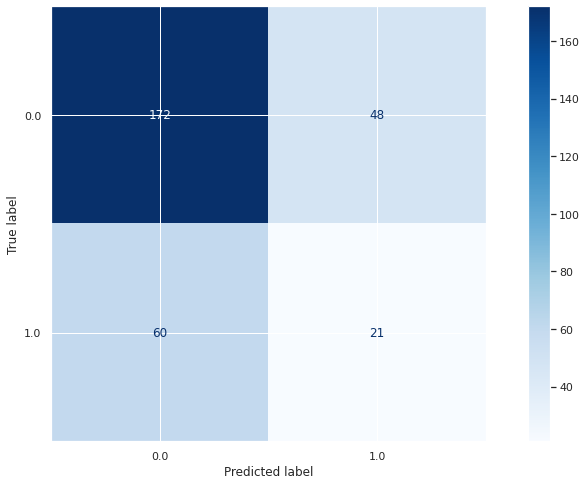

In [87]:
plot_confusion_matrix(dec_tree_pipeline, X_test, y_test, cmap = 'Blues')

Suprisingly, even though the model data was overfit to the testing data, this model performed the best in terms of predicting true "BAD" loans. At this time it would be best to talk to a field expert to see if we would be willing to sacrifice a larger number of fale positives for a larger number of true positives. 

### Tuning Decision Tree

We will tune the random forest model by using GridSearchCV. This will save us the need to write our own loops.

In [76]:
params = {
 'criterion': ['gini', 'entropy'],
 'max_depth': list(range(2,50)),
 'splitter': ['best', 'random'],
} # Define parameters to iterate through while testing GridSearchCV

grid_dec_tree = GridSearchCV(estimator = dec_tree, # Credit to the documentation for DecisionTreeClassifier
                             param_grid = params,
                             scoring = 'accuracy',
                             n_jobs = -1)

# View the model performance
grid_dec_pipeline = make_pipeline(preprocessor, grid_dec_tree)
grid_dec_pipeline.fit(X_train, y_train)

print(f"Training Scores for Tuned Random Forest Model Base: {grid_dec_pipeline.score(X_train, y_train)}")
print(f"Testing Scores for Tuned Random Forest Model Base: {grid_dec_pipeline.score(X_test, y_test)}")

Training Scores for Tuned Random Forest Model Base: 0.7447280799112098
Testing Scores for Tuned Random Forest Model Base: 0.7342192691029901


Tuning the model made the overfitness of the model minimal. At 73.4% accurate, our model performed pretty average when compared to other models. Let's see the true/false positive rates.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


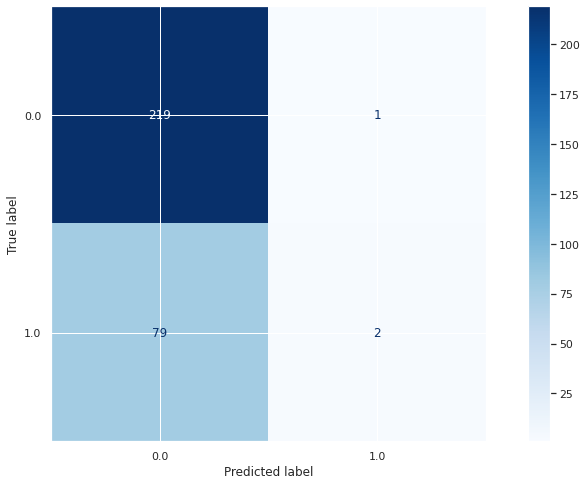

In [83]:
plot_confusion_matrix(grid_dec_pipeline, X_test, y_test, cmap = 'Blues')

After hypertuning the model for accuracy, we are left with a model that rarely every correctly predicts the "BAD" loans. 

# Chosen Model

Based on my finding using these models, I would use the base decision tree model. Even though the model seemed to be overfit to the training data and didn't have the highest accuracy, in this industry it is important to be able to predict the "BAD" loans, even if it requires losing some customers that would have provided good loans. Overall I would suggest looking into deep machine learning models to see if it is possible to yield higher-accuracy and "BAD" true-positive results. 